<a href="https://colab.research.google.com/github/Abhishek252/NLP/blob/master/sahicareer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem #5**

Predict next possible-word [n-gram approach].
Given a phrase, predict the next possible word as per the corpus with an incremental approach.


**Implementation**

In [0]:
# import required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM
import matplotlib.pyplot as plt

In [256]:
data = '''Just A Rather Very Intelligent System a.k.a JARVIS is created by Tony Stark natural-language and a
sophisticated artificial intelligence user interface computer system, named after Edwin Jarvis, the butler
who worked for Howard Stark. Though its primary duty is to automate Stark’s Malibu estate, the lifelike
program fulfills many other needs for Stark, like being an information source for him, a diagnostic tool, a
consultant and a voice of reason in Stark’s life. It was also responsible to provide security for Tony
Stark's Mansion and Stark Tower. After creating the Mark II armor, Stark uploaded JARVIS into all of
the Iron Man Armors, as well as allowing him to interact with the other Avengers, giving them valuable
information during combat. JARVIS may be the one intellect Stark feels most comfortable opening up to.
JARVIS can object to Stark’s commands if necessary. JARVIS speaks with a refined British accent, and
is capable of back talk, sarcasm and condescension. During the Ultron Offensive, JARVIS was destroyed
by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of
gaining access to nuclear missiles. His remains were found by Stark, who uploaded them into a synthetic
body made of vibranium and, in conjunction with Ultron's personality and an Infinity Stone. JARVIS'
duties were then taken over by FRIDAY.'''

corpus = data.lower().split('. ')
corpus

['just a rather very intelligent system a.k.a jarvis is created by tony stark natural-language and a\nsophisticated artificial intelligence user interface computer system, named after edwin jarvis, the butler\nwho worked for howard stark',
 'though its primary duty is to automate stark’s malibu estate, the lifelike\nprogram fulfills many other needs for stark, like being an information source for him, a diagnostic tool, a\nconsultant and a voice of reason in stark’s life',
 "it was also responsible to provide security for tony\nstark's mansion and stark tower",
 'after creating the mark ii armor, stark uploaded jarvis into all of\nthe iron man armors, as well as allowing him to interact with the other avengers, giving them valuable\ninformation during combat',
 'jarvis may be the one intellect stark feels most comfortable opening up to.\njarvis can object to stark’s commands if necessary',
 'jarvis speaks with a refined british accent, and\nis capable of back talk, sarcasm and condesce

In [0]:
#Ceate an instance of tokenizer that tokenized the data.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [258]:
# Word with corresponding sequence of integers
tokenizer.word_index

{'a': 1,
 'accent': 112,
 'access': 129,
 'after': 15,
 'all': 84,
 'allowing': 89,
 'also': 73,
 'although': 120,
 'an': 18,
 'and': 4,
 'armor': 83,
 'armors': 87,
 'artificial': 41,
 'as': 25,
 'automate': 55,
 'avengers': 91,
 'back': 114,
 'be': 96,
 'being': 64,
 'body': 135,
 'british': 111,
 'butler': 48,
 'by': 8,
 'can': 104,
 'capable': 113,
 'codes': 123,
 'combat': 94,
 'comfortable': 101,
 'commands': 106,
 'computer': 45,
 'condescension': 117,
 'conjunction': 138,
 'consultant': 68,
 'continued': 125,
 'created': 37,
 'creating': 80,
 'destroyed': 119,
 'diagnostic': 66,
 'during': 27,
 'duties': 143,
 'duty': 54,
 'edwin': 47,
 'estate': 57,
 'feels': 99,
 'for': 9,
 'found': 133,
 'friday': 147,
 'fulfills': 60,
 'gaining': 128,
 'giving': 92,
 'him': 20,
 'his': 29,
 'howard': 50,
 'if': 107,
 'ii': 82,
 'in': 21,
 'infinity': 140,
 'information': 19,
 'intellect': 98,
 'intelligence': 42,
 'intelligent': 35,
 'interact': 90,
 'interface': 44,
 'into': 24,
 'iron': 8

In [0]:
# total number of unique words in the corpus
total_words = len(tokenizer.word_index) + 1
total_words

In [0]:
#Create input sequences to train the model
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [263]:
#Number of input sequences
len(input_sequences)

211

In [0]:
#pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [266]:
input_sequences

array([[  0,   0,   0, ...,   0,  32,   1],
       [  0,   0,   0, ...,  32,   1,  33],
       [  0,   0,   0, ...,   1,  33,  34],
       ...,
       [  0,   0,   0, ..., 144, 145, 146],
       [  0,   0,   0, ..., 145, 146,   8],
       [  0,   0,   0, ..., 146,   8, 147]], dtype=int32)

In [0]:
# create predictors and label
xs = input_sequences[:,:-1]
labels = input_sequences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [268]:
ys

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [298]:
#create model
model = Sequential()
model.add(Embedding(total_words, 62, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(xs, ys, epochs=400, verbose=1)

Epoch 1/400
211/211 [==============================] - 2s 11ms/sample - loss: 4.9981 - acc: 0.0000e+00
Epoch 2/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.9819 - acc: 0.0616
Epoch 3/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.9638 - acc: 0.0427
Epoch 4/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.9305 - acc: 0.0427
Epoch 5/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.8240 - acc: 0.0427
Epoch 6/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.7748 - acc: 0.0427
Epoch 7/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.7358 - acc: 0.0427
Epoch 8/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.7080 - acc: 0.0379
Epoch 9/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.6786 - acc: 0.0474
Epoch 10/400
211/211 [==============================] - 0s 2ms/sample - loss: 4.6464 - acc: 0.0474
Epoch 11/400
2

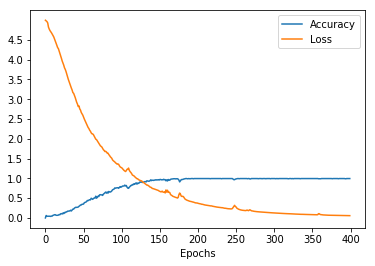

In [299]:
def plot_graphs(history, string):
    plt.plot(history.history[string], label="Accuracy")
    plt.plot(history.history['loss'], label="Loss")
    plt.xlabel("Epochs")
    plt.yticks(np.arange(0, 5, step=.5))
    plt.legend()
    plt.show()
    
plot_graphs(history, 'acc')

**Results:**

In [323]:
seed_text = "a sophisticated artificial".lower()
next_words = 2

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

a sophisticated artificial very intelligent


In [313]:
seed_text = "JARVIS was destroyed by".lower()
next_words = 1

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

jarvis was destroyed by ultron


In [318]:
seed_text = "JARVIS is created by".lower()
next_words = 2

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

jarvis is created by by stark


**Problem #6**
    Given a keyword, return the sentence(s) that has the keyword present in it.
    
    Input: armors
    Output:[
        'After creating the Mark II armor, Stark uploaded JARVIS into all of the Iron Man Armors, as well as allowing him to interact with the other Avengers, giving them valuable information during combat.'
    ]
    
    Input: ultron
    Output:[
        'During the Ultron Offensive, JARVIS was destroyed by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of gaining access to nuclear missiles.', 
        
        'His remains were found by Stark, who uploaded them into a synthetic body made of vibranium and, in conjunction with Ultron's personality and an Infinity Stone.]
    

    ]
    
    Input: ultron offensive
    Output:[
        'During the Ultron Offensive, JARVIS was destroyed by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of gaining access to nuclear
        missiles.']

**Implementation:**

In [0]:
# load important libraries
import string
import re

In [0]:
data = '''Just A Rather Very Intelligent System a.k.a JARVIS is created by Tony Stark natural-language and a
sophisticated artificial intelligence user interface computer system, named after Edwin Jarvis, the butler
who worked for Howard Stark. Though its primary duty is to automate Stark’s Malibu estate, the lifelike
program fulfills many other needs for Stark, like being an information source for him, a diagnostic tool, a
consultant and a voice of reason in Stark’s life. It was also responsible to provide security for Tony
Stark's Mansion and Stark Tower. After creating the Mark II armor, Stark uploaded JARVIS into all of
the Iron Man Armors, as well as allowing him to interact with the other Avengers, giving them valuable
information during combat. JARVIS may be the one intellect Stark feels most comfortable opening up to.
JARVIS can object to Stark’s commands if necessary. JARVIS speaks with a refined British accent, and
is capable of back talk, sarcasm and condescension. During the Ultron Offensive, JARVIS was destroyed
by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of
gaining access to nuclear missiles. His remains were found by Stark, who uploaded them into a synthetic
body made of vibranium and, in conjunction with Ultron's personality and an Infinity Stone. JARVIS'
duties were then taken over by FRIDAY.'''

data = data.split(". ")

In [0]:
def keyword_filter(keyword, data):
    for line in data:
        if keyword in line.lower():
            print("\n"+ line +"."+"\n")

**Result:**

In [253]:
keyword_filter(input("Enter keyword: "), data)

Enter keyword: armors

After creating the Mark II armor, Stark uploaded JARVIS into all of
the Iron Man Armors, as well as allowing him to interact with the other Avengers, giving them valuable
information during combat.



In [249]:
keyword_filter(input("Enter keyword: "), data)

Enter keyword: ultron

During the Ultron Offensive, JARVIS was destroyed
by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of
gaining access to nuclear missiles.


His remains were found by Stark, who uploaded them into a synthetic
body made of vibranium and, in conjunction with Ultron's personality and an Infinity Stone.



In [251]:
keyword_filter(input("Enter keyword: "), data)

Enter keyword: ultron offensive

During the Ultron Offensive, JARVIS was destroyed
by Ultron, although his remaining programming codes unknowingly continued to thwart Ultron's plans of
gaining access to nuclear missiles.

